<a href="https://colab.research.google.com/github/EricOdhiambo/Predicting-the-popularity-of-a-COVID-19-related-tweet-/blob/main/popularity_of_covid19_related_tweets_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Predict the popularity of COVID-19-related tweets in terms of the number of their retweets



**Project Objective**


**Project Guide**

The goal of this project is achieved by employing the life cycle of a Data Science Project. The cycle consists of the phases below:


1.   Business Understanding
2.   Data Understanding 
 *   Data Collection
    
3.   Data preperation   
4.   Exploratory Data Analysis
5.   Data Modelling
6.   Model Evaluation 


## **1. Phase 1: Business Understanding**

The aim of this project is to **predict the popularity of COVID-19-related tweets in terms of the number of their retweets**. Basically, we will predict a tweet’s popularity using the number of its retweets as influenced by other factors that relate to it.

# **2. Phase 2: Data Collection**

In [ ]:
# Setting up required packages and dependecies

import sys # give access to variables and functions that interact strongly with interpreter
import matplotlib.pyplot as plt #to plot graphs and histograms
%matplotlib inline
import numpy as np #for linear algebra
from scipy.stats import randint
import pandas as pd #processing the datasets, CSV file I/O
import seaborn as sbn #to plot interactive graphs

In [ ]:
#mounting drive to google colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the dataset to be used as a data frame called tw_export_df
tw_export_df = pd.read_excel('/content/drive/MyDrive/tw_export.xlsx')

In [ ]:
#printing a sample of the dataset as a dataframe
tw_export_df.sample(25)

,Tweet ID,Username,Timestamp,#Followers,#Friends,#Retweets,#Favorites,Entities,Sentiment,Mentions,Hashtags,URLs
81141,1.184826e+18,10bad4a64bb1412736cbec1d069a342b,Thu Oct 17 13:37:25 +0000 2019,866,1211,5,10,null;,1 -2,null;,null;,null;
41281,1.182416e+18,f3099df8c95413f4970b352d700a3388,Thu Oct 10 22:03:01 +0000 2019,20,56,0,0,null;,2 -2,null;,AutismSpeaks,null;
95384,1.186591e+18,d1a27a60b91880fe9ab6b3d3974cca73,Tue Oct 22 10:30:31 +0000 2019,147,371,0,0,pharmacy:Pharmacy:-2.7611674423555717;,1 -1,RetellPharmacy,null;,null;
99541,1.179124e+18,f656e409e8495145a7aae449d9ae1749,Tue Oct 01 20:02:15 +0000 2019,1890,831,0,0,null;,1 -1,null;,null;,null;
54630,1.183431e+18,ee6984537a2c5dc38f4d176927f6392b,Sun Oct 13 17:13:17 +0000 2019,569,293,0,0,null;,1 -1,null;,null;,null;
92126,1.183594e+18,efdabdfac19e5837f064d83f50d0c4b9,Mon Oct 14 04:02:21 +0000 2019,2223,1928,44,81,null;,1 -3,null;,WildOutWednesday FreakNikFriday,null;
38586,1.180107e+18,e45f864ad2aae189cf61d4abd2002a55,Fri Oct 04 13:05:41 +0000 2019,30532,735,0,0,electronic cigarette:Electronic_cigarette:-0.6...,1 -1,null;,null;,https://www.timesunion.com/news/article/Judge-...
63598,1.180351e+18,c1950cfddd7e1835e9e34abed36f75e0,Sat Oct 05 05:17:53 +0000 2019,817,1688,0,0,china:China:-2.113921624336916;life expectancy...,1 -1,null;,null;,https://twitter.com/Gundisalvus/status/1179095...
19444,1.185096e+18,eb5400b118492db3d62ef1073cbf92df,Fri Oct 18 07:32:25 +0000 2019,1948,2332,0,0,business plan:Business_plan:-2.7397893068407955;,1 -2,kyledrake VitalikButerin glenweyl nytopinion p...,null;,null;
81719,1.185288e+18,3d813ecb33379f4db8ff43b129fbce66,Fri Oct 18 20:16:04 +0000 2019,2239,277,10,19,kurdish people:Kurds:-1.7805603333846196;sason...,1 -3,null;,SDF SDF,null;


# **3. Phase 3: Data Preparation -- *Data cleaning**


After making a copy of the dataframe, this section will be guided by the following steps: 
1. Renaming fields - Splitting the Sentiment column into Positive_sentiments and Negative_sentiments and casting these two columns datatypes as integer. 
2. Extracting the specific hour of the post and creating a new column Specific_hour
3. Extracting the number of mentions and creating a new column Number_of_Mentions
4. Extracting the number of hashtags and creating a new column Number_of_Hashtags
5. After creating new columns from existing columns, these existing columns  (Sentiments, Timestamp, Mentions and Hashtags) are dropped. This will further improve the data's quality by making the data more accurate 

The cleaned dataframe is then saved as a new dataframe.



* **Making a copy of the dataframe**

In [ ]:
# making a copy of tw_export_df the tw_export.xlsx dataset 
# creating a new data frame 'cleaning_df' and 
cleaning_df = tw_export_df.copy()

In [ ]:
# Gathering  the dataframe's information
cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Tweet ID    100000 non-null  float64
 1   Username    100000 non-null  object 
 2   Timestamp   100000 non-null  object 
 3   #Followers  100000 non-null  int64  
 4   #Friends    100000 non-null  int64  
 5   #Retweets   100000 non-null  int64  
 6   #Favorites  100000 non-null  int64  
 7   Entities    100000 non-null  object 
 8   Sentiment   100000 non-null  object 
 9   Mentions    99767 non-null   object 
 10  Hashtags    99969 non-null   object 
 11  URLs        100000 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 9.2+ MB


## 3.1 Splitting Sentiment column into two columns Positive and Negative Sentiment

In [ ]:
# Splitting Sentiment column and creating positive sentiment column
cleaning_df["Positive_sentiments"]=(cleaning_df.Sentiment.str.split(" ").apply(lambda x: int(x[0])))

# Splitting Sentiment column and creating negative sentiment column
cleaning_df["Negative_sentiments"]=(cleaning_df.Sentiment.str.split(" ").apply(lambda x: int(x[1])))

In [ ]:
#checking the dataframe's info after splitting sentiment column
cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Tweet ID             100000 non-null  float64
 1   Username             100000 non-null  object 
 2   Timestamp            100000 non-null  object 
 3   #Followers           100000 non-null  int64  
 4   #Friends             100000 non-null  int64  
 5   #Retweets            100000 non-null  int64  
 6   #Favorites           100000 non-null  int64  
 7   Entities             100000 non-null  object 
 8   Sentiment            100000 non-null  object 
 9   Mentions             99767 non-null   object 
 10  Hashtags             99969 non-null   object 
 11  URLs                 100000 non-null  object 
 12  Positive_sentiments  100000 non-null  int64  
 13  Negative_sentiments  100000 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 10.7+ MB


##3.2 Extracting the specific hour of the post and creating a new column Specific_hour

In [ ]:
# fetching exact hours from Timestamp column
cleaning_df["Timestamp"]=pd.to_datetime(cleaning_df.iloc[:,2]).apply(lambda x: x.hour)

In [ ]:
# renaming Timestamp column to Specific_hour
cleaning_df.rename(columns = {"Timestamp":"Specific_hour"}, inplace = True)

In [ ]:
# checking the dataframe
cleaning_df.sample(5)

,Tweet ID,Username,Specific_hour,#Followers,#Friends,#Retweets,#Favorites,Entities,Sentiment,Mentions,Hashtags,URLs,Positive_sentiments,Negative_sentiments
52815,1.181860e+18,a9a36effcff169e7000663ed6eafd519,9,16148,14,0,0,ukraine:Ukraine:-1.6392896300533573;,2 -1,IrishTimesWorld,null;,https://www.irishtimes.com/news/world/us/from-...,2,-1
15724,1.181784e+18,9f66a1f5ff3df6d7b77edaad918674f9,4,3958,1978,329,645,bts:BTS:-1.442639753934362;concert tour:Concer...,2 -3,BTS_twt,null;,null;,2,-3
2906,1.181465e+18,bcd96e43e2dedc0de312d00b2455b1f0,7,89,146,0,0,community status:List_of_municipalities_in_Pri...,2 -4,EmeraldSARC NOMOREorg,rape sexualabuse BlackHistoryMonth,null;,2,-4
30355,1.183793e+18,e81042656ec36b00db310957c242c443,17,16,69,0,0,i am canadian:I_Am_Canadian:-1.667253970296197...,2 -3,BarackObama AmbassadorRice,null;,null;,2,-3
54685,1.183460e+18,34b9acfbdc3e1135a704a1a0eab46ab6,19,4,14,0,0,fortnite:Fortnite:-1.4924107816453622;,1 -1,null;,RIPFortnite Fortnite FortniteChapter2 fortnite...,null;,1,-1


##3.3  Extracting the number of mentions and creating a new column Number_of_Mentions

In [ ]:
# creating a function to create a new column from an existing column
def newColumn (existing_column_name, new_column):
  cleaning_df[new_column]=(cleaning_df[existing_column_name]
                           .apply(lambda x: str(x))).apply(lambda x: 0 if 'null;' in x else len(x.split())) #usimg apply() function with lambda to replace the
                                                                                                            #columns entries, null; is replaced with 0

                                                                                                            
#calling the function newColumn to create the Number_of_Column
newColumn('Mentions', 'Number_of_Mentions')

##3.4 Extracting the number of hashtags and creating a new column Number_of_Hashtags

In [ ]:
#calling the function newColumn to create a new column Number_of_Hashtags
newColumn('Hashtags', 'Number_of_Hashtags')

In [ ]:
# checking the dataframe
cleaning_df.sample(5)

,Tweet ID,Username,Specific_hour,#Followers,#Friends,#Retweets,#Favorites,Entities,Sentiment,Mentions,Hashtags,URLs,Positive_sentiments,Negative_sentiments,Number_of_Mentions,Number_of_Hashtags
1436,1.180102e+18,e70d36e99e0f4e1e5c4b52a8c204f412,12,154,394,0,0,skynews:Sky_News:-2.4443176685121135;smuggling...,1 -3,Kieenoo 156v6 KingsHeathBlues MarcusSlack SkyN...,null;,null;,1,-3,7,0
89255,1.181096e+18,7124ce330fef6b6ef91a622705b2901d,6,1539,115,0,0,null;,1 -1,MrEatYaBooty ReadToriko abthe4th,null;,null;,1,-1,3,0
4708,1.182970e+18,58e6701d01d1158865e7769001155291,10,3071,2259,0,0,null;,1 -1,null;,null;,null;,1,-1,0,0
9413,1.187301e+18,4028c7c41fd4e12925d5e4c8c9259ec3,9,49182,49564,51,74,on a slow boat to china:%28I%27d_Like_to_Get_Y...,2 -2,BreitbartNews,null;,https://www.breitbart.com/sports/2019/10/23/un...,2,-2,1,0
21970,1.187419e+18,f3236299b7d8cb5ea8e8d402b153563d,17,2052,247,0,0,china:China:-2.113921624336916;,2 -3,PropheticOneTHE,null;,null;,2,-3,1,0


In [ ]:
# printing the dataframe's column
cleaning_df.columns

Index(['Tweet ID', 'Username', 'Specific_hour', '#Followers', '#Friends',
       '#Retweets', '#Favorites', 'Entities', 'Sentiment', 'Mentions',
       'Hashtags', 'URLs', 'Positive_sentiments', 'Negative_sentiments',
       'Number_of_Mentions', 'Number_of_Hashtags'],
      dtype='object')

##3.5 Dropping the columns "Sentiment", "Mentions", and "Hashtags" 

After creating new columns Positive_sentiments, Negative_sentiments, Number_of_mentions, and Number_of_hashtags from Sentimen, Mentions and Hashtags columns, we notice that our dataframe's qality was poor. This was evident with columns with slightly repetitive data. To make the dataframe accurate, we drop the Sentiment", "Mentions", and "Hashtags" columns. 

In [ ]:
# dropping "Sentiment", "Mentions", "Hashtags" columns to achieve the data's accuracy
cleaning_df.drop(["Sentiment", "Mentions", "Hashtags"], axis = 1, inplace = True)

In [ ]:
# printing the dataframe's column after dropping some columns
cleaning_df.columns

Index(['Tweet ID', 'Username', 'Specific_hour', '#Followers', '#Friends',
       '#Retweets', '#Favorites', 'Entities', 'URLs', 'Positive_sentiments',
       'Negative_sentiments', 'Number_of_Mentions', 'Number_of_Hashtags'],
      dtype='object')

In [ ]:
# checking the dataframe
cleaning_df.sample(5)

,Tweet ID,Username,Specific_hour,#Followers,#Friends,#Retweets,#Favorites,Entities,URLs,Positive_sentiments,Negative_sentiments,Number_of_Mentions,Number_of_Hashtags
39086,1.180559e+18,cbb4b6df81095d17234cdeb0ab987ccb,19,242,235,0,0,wilmington de:Wilmington%2C_Delaware:-1.227189...,null;,2,-1,0,2
60553,1.188876e+18,af79c1555dc5cbc37d3be7726d755000,17,139,144,0,0,null;,null;,1,-1,1,0
21705,1.187163e+18,2c714987bd36b141ab204e4ee9ee93a5,0,1002,975,0,0,naiad:Naiad:-1.630144279077398;tx:Texas:-2.558...,null;,3,-1,39,0
22608,1.188067e+18,2c0f63c1ec1e36c7811a7f1c57abc8ab,12,678,2599,0,0,cnn:CNN:-0.9113024985533761;soft power:Soft_po...,null;,1,-3,4,0
83637,1.187137e+18,76031f2e49bb89e97a2cde65fa238350,22,15948,663,2,5,null;,null;,1,-1,0,0


##3.6 Working on missing values




*   Initially, we noticed that some columns had missing values. These columns were Hashtags and Mentions
*   These entries would have been filled by the columns mean, median or even 0
* Subsequently, after creating new columns (Number_of_Hashtags and Number_of_Mentions) from the Hashtags and Mentions column respectively, we saw it wise to drop the Hashtags and Mentions columns to improve the data's accuracy and quality
* Dropping these columns equally ensured no missing values in our data frame   





In [ ]:
#checking the total missing values in different columns
cleaning_df.isna().sum()

Tweet ID               0
Username               0
Specific_hour          0
#Followers             0
#Friends               0
#Retweets              0
#Favorites             0
Entities               0
URLs                   0
Positive_sentiments    0
Negative_sentiments    0
Number_of_Mentions     0
Number_of_Hashtags     0
dtype: int64

##3.7 Extra wrangling - checking duplicates in the dataframe after cleaning

In [ ]:
# checking if the dataframe has duplicate values using the sum() function

duplicate_rows = cleaning_df[cleaning_df.duplicated()]
sum(cleaning_df.duplicated())

0

> The dataframe has 0 duplicate rows

##3.8 Saving the dataframe after cleaning -- cleaned_df

In [ ]:
#initializing a the cleaned dataframe to a new dataframe cleaned_df
cleaned_df = cleaning_df

In [ ]:
# printing the cleaned dataframe info
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Tweet ID             100000 non-null  float64
 1   Username             100000 non-null  object 
 2   Specific_hour        100000 non-null  int64  
 3   #Followers           100000 non-null  int64  
 4   #Friends             100000 non-null  int64  
 5   #Retweets            100000 non-null  int64  
 6   #Favorites           100000 non-null  int64  
 7   Entities             100000 non-null  object 
 8   URLs                 100000 non-null  object 
 9   Positive_sentiments  100000 non-null  int64  
 10  Negative_sentiments  100000 non-null  int64  
 11  Number_of_Mentions   100000 non-null  int64  
 12  Number_of_Hashtags   100000 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 9.9+ MB


# **4. Phase 4: Exploratory Data Analysis**

We then proceed to plot visualizations of distribution on Followers, Friends and Favorites. To draw more meaning through our visualizations (Histograms), we employ the Numpy's np.log10() method which will enable us find the natural logarithm of the entries in these three columns to be visualized and further enable creation of a good range of values on the x-axis.

## 4.1 Visualizing the variable #Followers

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


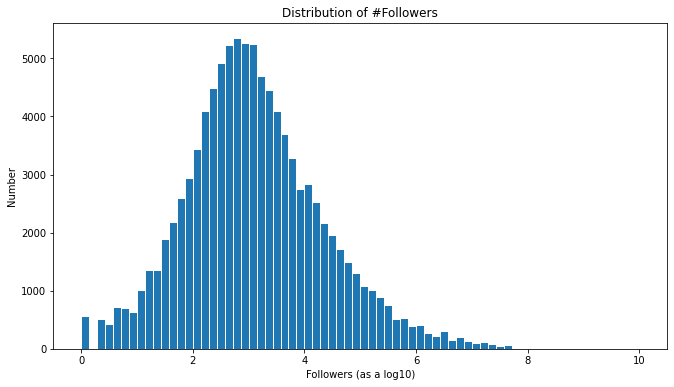

In [ ]:
# Creating a function plot_histogram with the different parameters it will hold
def plot_histogram(column_name, xaxis_label, yaxis_label, title):
  
  #using the np.log10 to scale the plot 
  np.log10(cleaned_df[column_name]).plot.hist(figsize=[11, 6], bins=70, range=[0,10], edgecolor="white")
  plt.xlabel(xaxis_label)
  plt.ylabel(yaxis_label)
  plt.title(title)

#calling the plot_histogram function and setting values to plot distribution of Log(Followers)
plot_histogram('#Followers','Followers (as a log10)', 'Number', 'Distribution of #Followers')



*   The #Followers distribution is a normal distribution 



## 4.2 Visualizing the variable #Friends

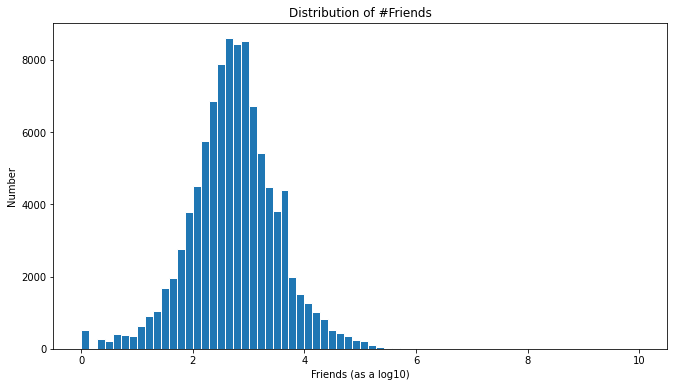

In [ ]:
#calling the plot_histogram function and setting values to plot distribution of Log(Friends)
plot_histogram('#Friends','Friends (as a log10)', 'Number', 'Distribution of #Friends')



*   The metric #Friends distribution is a normal distribution too with two peaks above 8000 



## 4.3 Visualizing the variable #Favorites

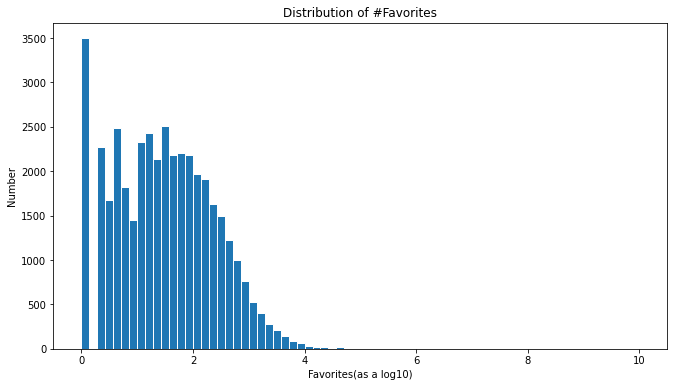

In [ ]:
#calling the plot_histogram function and setting values to plot distribution of Log(Favorites)
plot_histogram('#Favorites','Favorites(as a log10)', 'Number', 'Distribution of #Favorites')




* #Favorites distribution is highly skeewed to the right
* Its highhest number/frequency is around 3500




## 4.4 Displaying the correlation matrix between #Followers, #Friends, #Favorites, Positive Sentiments and Negative Sentiments with respect to #Retweets

In [ ]:
# creating a variable columns to hold the dataframe's target columns for plotting correlation matrix 
columns=["#Retweets", "#Followers", "#Favorites", "#Friends", "Positive_sentiments", "Negative_sentiments"]

# using the correlation function corr() on our data frame
# to print correlation of the variables
corr = cleaned_df[columns].corr() 

#setting up the correlation style for our output for easier visualization
corr.style.background_gradient(cmap='coolwarm') 

,#Retweets,#Followers,#Favorites,#Friends,Positive_sentiments,Negative_sentiments
#Retweets,1.000000,0.134503,0.890328,0.026502,0.000433,-0.010565
#Followers,0.134503,1.000000,0.172158,0.011337,-0.027071,0.008711
#Favorites,0.890328,0.172158,1.000000,0.017877,0.002533,-0.003889
#Friends,0.026502,0.011337,0.017877,1.000000,-0.000555,-0.007891
Positive_sentiments,0.000433,-0.027071,0.002533,-0.000555,1.000000,-0.039849
Negative_sentiments,-0.010565,0.008711,-0.003889,-0.007891,-0.039849,1.000000


* We noticed that #Favorites is has a strong positive correlation (0.89) with #Retweets 

**Output question 1: What do these plots and correlation matrix signify?**




>   The histograms plotted display how frequently the numerical data  (features) occur. The height of the rectangles, using the vertical axis, symbolizes the frequency of the variable's distribution 

>   The correlation matrix signifies the relationship/ correlation between the different variables. This includes showing the correlation between the target variable to be predicted and other variables.






> Plotting the correlation matrices of the different variables and assessing the values with respesct to the dependent/target variable (#Retweets) we notice that #Favourites, one of the independent variables, is strongly correlated with #Retweets with a correlation matrix of 0.8.



**Output question 2: What do the signs (+/-) before the correlation magnitudes signify?**


> The '+' sign before a correlation magnitude signifies a positive correlation which will imply that an increases in one the variables causes an increase in another variable and vice versa, whereas the '-' negative sign before a correlation value signifies a negative correlation which implies that the variables are inversely related with an increase in one variable seeing a decrease in another variable and vice versa.



**Output question 3: If a feature shows 0 correlation to #Retweets, does that mean it could not contribute to prediction?**


> A feature's 0 correlation to #Retweets means that the given variable has no influence at all to the prediction of #Retweets. Although correlation does not imply causation, a CORRELATION VALUE OF 0 to a target value strongly affirms the variables' zero influence on the target variable. 



##4.5 Further data wrangling



*   At this point, we are able to argue that some other variables like Tweet ID, Username, URLs, and Entities do not influence the #Retweets variable and therefore the prediction of #Retweets
*   We therefore drop such columns to make our data more accurate for the next phase of data modelling.



In [ ]:
# dropping more columns
cleaned_df.drop(["Tweet ID", "Username", "URLs", "Entities"], axis = 1, inplace = True)

In [ ]:
# displaying the dataframe info
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Specific_hour        100000 non-null  int64
 1   #Followers           100000 non-null  int64
 2   #Friends             100000 non-null  int64
 3   #Retweets            100000 non-null  int64
 4   #Favorites           100000 non-null  int64
 5   Positive_sentiments  100000 non-null  int64
 6   Negative_sentiments  100000 non-null  int64
 7   Number_of_Mentions   100000 non-null  int64
 8   Number_of_Hashtags   100000 non-null  int64
dtypes: int64(9)
memory usage: 6.9 MB


In [ ]:
# printing a sample of the dataframe
cleaned_df.sample(5)

,Specific_hour,#Followers,#Friends,#Retweets,#Favorites,Positive_sentiments,Negative_sentiments,Number_of_Mentions,Number_of_Hashtags
6633,2,976,487,0,0,2,-1,1,1
19701,21,1581,2220,0,0,3,-1,0,0
8644,13,266,391,0,0,1,-1,5,0
38409,1,1,58,0,0,2,-1,0,0
50692,23,1026,256,4,14,1,-1,0,1


##4.6 Saving the data frame after final cleaning

In [ ]:
#creating a dataframe final_df that will save the cleaned dataframe as a master CSV file

cleaned_df.to_csv(r'/content/drive/MyDrive/tw_export_master.csv', index=False)

# **5. Phase 5: Data Modelling**

In [ ]:
# Setting the dependencies
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import math

## 5.1   Data Transformation -- Normalizing the Attributes using MinMaxScaler

*   Normalizing attributes is the process of transforming the features’ values which are numeric in a given data set so that the values be in a specific range.
*   Normalization is mostly achieved using a scalar.
*   For example, in this case, the values in the ‘#Favorites’ column, which is a feature in our dataset, were normalized. Its values were transformed to be in a range between 0 and 1.


In [ ]:
#loading dataframe to be used
final_df = pd.read_csv('/content/drive/MyDrive/tw_export_master.csv')

In [ ]:
#printing the dataframe's columns
final_df.columns

Index(['Specific_hour', '#Followers', '#Friends', '#Retweets', '#Favorites',
       'Positive_sentiments', 'Negative_sentiments', 'Number_of_Mentions',
       'Number_of_Hashtags'],
      dtype='object')

In [ ]:
values = final_df.values

# ensure all data is float
values = values.astype('float32')

# creting a data object x that is initialized to  
# our dataframe. We drop the target variable, and use 
# it to create another data object
x = final_df.drop("#Retweets", axis=1)

# creting a data object y that is initialized to  
# our target variable as a dataframe
y = final_df["#Retweets"]

# defining the min max scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# normalizing features
scaled_df = scaler.fit_transform(x)
scaled_df=pd.DataFrame(scaled_df,columns=x.columns)

In [ ]:
#printing a sample of the normalized dataframe
scaled_df.sample(10)

,Specific_hour,#Followers,#Friends,#Favorites,Positive_sentiments,Negative_sentiments,Number_of_Mentions,Number_of_Hashtags
63057,0.913043,8.212561e-05,0.002245,0.000787,0.5,0.25,0.00,0.000000
5711,1.000000,6.998045e-06,0.000479,0.000000,0.0,1.00,0.12,0.033333
2375,1.000000,1.274874e-03,0.030681,0.000156,0.0,1.00,0.00,0.000000
90408,0.000000,1.572025e-06,0.000119,0.000000,0.0,1.00,0.22,0.000000
11914,0.913043,2.345359e-06,0.000119,0.000000,0.0,0.50,0.00,0.000000
61812,0.913043,4.817495e-07,0.000024,0.000000,0.5,1.00,0.00,0.000000
69355,0.217391,2.028419e-07,0.000166,0.000000,0.0,1.00,0.22,0.000000
74251,0.782609,5.766414e-04,0.000152,0.003863,0.5,1.00,0.00,0.000000
63069,0.956522,1.750779e-05,0.000257,0.000000,0.5,1.00,0.00,0.000000
47815,0.826087,8.113675e-06,0.000289,0.000000,0.5,0.75,0.00,0.000000


## 5.2  Splitting the normalized dataframe into train and test sets

In [ ]:
# creating a method to split normalized data to train and test set
def split_to_train_and_test(x, y, test_size):
    #creating data objects x_train, x_test, y_train, and y_test and initializing them 
    x_train, x_test, y_train, y_test = train_test_split(scaled_df, y, test_size=test_size)
    #printing the shapes of the train set and test sets
    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
    # seting the return outputs
    return x_train, x_test, y_train, y_test

In [ ]:
#calling the split_to_train_and_test method and passing parameters to it
# which include the scaled dataframe and a split measure of 0.20
x_train, x_test, y_train, y_test = split_to_train_and_test(scaled_df, y, 0.20)

(80000, 8) (20000, 8) (80000,) (20000,)


*   The output (80000, 8) and (80000,) illustrates a train set which will be the first  80,000 samples of the data frame.
*   The output (20000, 8) and (20000,) illustrates a test set which will be  the last 20,000 samples of the data frame.




# **6. Phase 6: Model Evaluation**

This phase is guided by: 
1. Training and Testing different models
2. Evaluating the models on differnt Evaluation metrics

## 6.1 Training and Testing different models

### **6.1.1 Creating (Training) a Multiple Regression model and making a prediction using it**

In [ ]:
# building random forest model
lin_reg_model = LinearRegression()

# using the model.fit() function to ensure that the returned result(model) does not 
# overfit or underfits thus ensuring the model's reliability and accuracy
lin_reg_model.fit(x_train,y_train)

#Prediction using test set and hold the result to a data object y_predict
y_predict = lin_reg_model.predict(x_test)

# finding the Mean Square Error
mse=metrics.mean_squared_error(y_test, y_predict)

#calculating the RMSE
rmse = math.sqrt(mse)

# Printing the differenet Evaluation metrics
print('R-Squared:',metrics.r2_score(y_test, y_predict))
print('Root Mean Square Error: %.3f' % rmse)

R-Squared: 0.5357372352959353
Root Mean Square Error: 235.778


### **6.1.1 Creating (Training) a Random Forest Regressor model and making a prediction using it**

In [ ]:
# building random forest model
random_forest_regr_model = RandomForestRegressor(max_depth=10)

# using the model.fit() function to ensure that the returned result(model) does not 
# overfit or underfits thus ensuring the model's reliability and accuracy
random_forest_regr_model.fit(x_train,y_train)

#Predicting the #Retweets using the test set 
y_prediction = random_forest_regr_model.predict(x_test)

# finding the Mean Squared Error
mse=metrics.mean_squared_error(y_test, y_prediction)

#calculating the RMSE
rmse = math.sqrt(mse)

# Printing the different evaluation metrics
print('Random Forest Regressor Accuracy: ', random_forest_regr_model.score(x_test,y_test))
print('R-squared:',metrics.r2_score(y_test, y_prediction))
print('Root Mean Square Error: %.3f' % rmse)

Random Forest Regressor model Accuracy:  0.5226542050852183
R-squared: 0.5226542050852183
Root Mean Square Error: 239.077


## 6.2 Evaluating different models on different Evaluation metrics

**⦁	Compare the two regression methods you used in the previous part on the training and test sets. What evaluation metrics are appropriate?**

> The two regression methods that have been employed are Multiple Linear Regression and Random Forest Regressor. **The Random Forest , with an accuracy of 0.72 performed better than the Multiple Linear Regression**. 